In [1]:
from __future__ import division, print_function
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
df = pd.read_csv('data/nba2k20-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [3]:
def transform_data(data_frame):
    data_frame["salary_value"] = data_frame["salary"].transform(lambda x: float(x[1:]))
    data_frame["draft_round"] = data_frame["draft_round"].transform([lambda x: (-1) if x == "Undrafted" else int(x)])
    data_frame["draft_peak"] = data_frame["draft_peak"].transform([lambda x: (-1) if x == "Undrafted" else int(x)])
    data_frame["team"] = data_frame["team"].transform(lambda x: str(x))
    data_frame["b_day"] = data_frame["b_day"].transform(lambda x: parse(x))
    data_frame["age"] = data_frame["b_day"].transform(lambda x: relativedelta(datetime.today(), x).years)
    data_frame["weight_kg"] = data_frame["weight"].transform(lambda x: float(x[x.find("/")+1:x.find("kg")]))
    data_frame["height_mts"] = data_frame["height"].transform(lambda x: float(x[x.find("/")+1:]))
    data_frame["rating_lvl"] = data_frame["rating"].transform(lambda x: 0 if x < 75 else (1 if x < 85 else 2))
    return data_frame
    
df = transform_data(df)
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,salary_value,age,weight_kg,height_mts,rating_lvl
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,37436858.0,36,113.4,2.06,2
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,32742000.0,30,102.1,2.01,2
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,25842697.0,27,109.8,2.11,2
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,37199000.0,33,104.3,2.08,2
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,38199000.0,32,99.8,1.96,2


In [4]:
dfx = pd.DataFrame(df, columns=['salary_value', 'age', 'weight_kg', 'height_mts'])
y =  df["rating_lvl"]

Meaning of the 2 components:


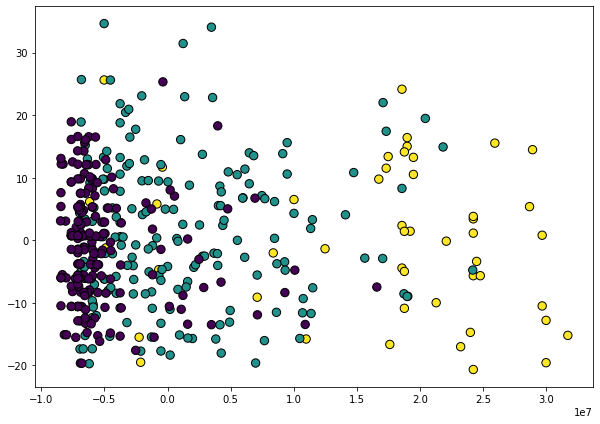

In [5]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(dfx)

print("Meaning of the 2 components:")

plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, edgecolor="k")
plt.show()

Text(0.5, 1.0, 'KMeans clusters')

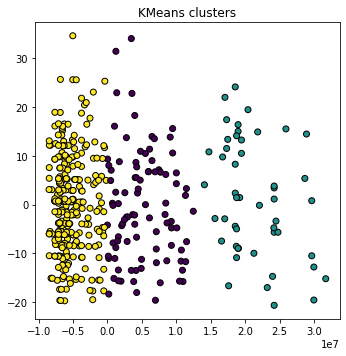

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

X, y = X_reduced, df["rating_lvl"]

y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolor='k')
plt.title("KMeans clusters")

In [9]:
from math import sqrt

def pin(x, y):
    up = 0
    down = 0
    for i in range(len(y)):
        for j in range(i):
            if (y[i] == y[j]):
                up += sqrt((x[i][0] - x[j][0])**2 + (x[i][1] - x[j][1])**2)
                down += 1
    return up/down

def pout(x, y):
    up = 0
    down = 0
    for i in range(len(y)):
        for j in range(i):
            if (y[i] != y[j]):
                up += sqrt((x[i][0] - x[j][0])**2 + (x[i][1] - x[j][1])**2)
                down += 1
    return up/down

print("Внутрикластерное расстояние прогнозируемых кластеров:")
print(pin(X_reduced, y_pred))
print("Межкласторное расстояние прогнозируемых кластеров:")
print(pout(X_reduced, y_pred))
print("Внутрикластерное расстояние реальных категорий:")
print(pin(X_reduced, y))
print("Межкласторное расстояние реальных категорий:")
print(pout(X_reduced, y))
print("Отношения расстояний:")
print(pin(X_reduced, y_pred)/pout(X_reduced, y_pred))
print(pin(X_reduced, y)/pout(X_reduced, y))

Внутрикластерное расстояние прогнозируемых кластеров:
2508787.1070181807
Межкласторное расстояние прогнозируемых кластеров:
16022214.759609187
Внутрикластерное расстояние реальных категорий:
5514601.887828263
Межкласторное расстояние реальных категорий:
11756387.096221264
Отношения расстояний:
0.1565817925086516
0.4690728403797427
